
# Linear Regression in Python 3.x
## Theory Behind Linear Regression
### Anirudh Jonnalagadda, PhD
##### Shell Postdoctoral Fellow @ CDS, IISc
###### (anirudhj@iisc.ac.in)

### What is Regression?

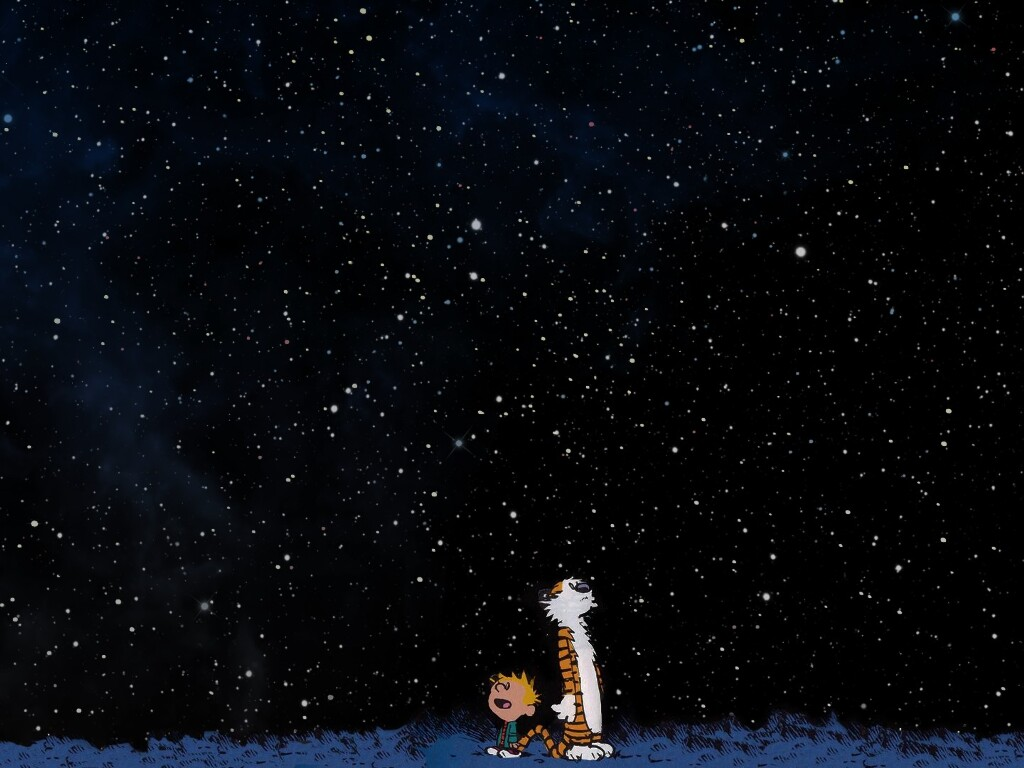
(source - google, Bill Waterson's Calvin and Hobbes)

In [ ]:
# for google colab
# import requests
# from io import BytesIO
# from PIL import Image
# url = 'https://raw.githubusercontent.com/jAnirudh/SVNIT/main/starrynight.jpg'
# page = requests.get(url)
# Image.open(BytesIO(page.content))

- In nature, unless you look at systems through Quantum Mechanics, _everything_ is deterministic.
- This means that if I give you data which is seemingly unrelated, there would be some functional dependance between the cause and the effect

In essence, regression __models__ a true functional dependance $y = f(\vec{x})$ and tries to obtain an approximate function $y = f(\vec{x}, \vec{\theta})$, by estimating $\vec{\theta}$

The formal definition of a regression function is 

$$r(x) = \mathbf{E}(Y|X=x)$$

i.e. what is the value of $Y$ that I __expect__ to observe, given that I have observed that my "Random Variable" $X=x$

## Linear Regression

Linear Regression makes life easy by assuming that the functional dependance is linear!

Let us first take the "simple" case where our $\vec{x} = x$ i.e. the functional dependance is only on one variable

We are therefore looking for the regressor $$r(x) = \mathbf{E}(Y|X=x) = f(x, \hat{\beta_0}, \hat{\beta_1}) = Y_i = \hat{\beta_0} + \hat{\beta_1} X_i.$$ Basically, we are looking to _fit_ a straight line with slope $\hat{\beta_1}$ and intercept $\hat{\beta_0}$.

__This is Simple Linear Regression__

If we have $Y_i = \hat{\beta_0} + \sum_j \hat{\beta_j} X_{i, j}$, we have __Multiple Linear Regression__

## How to we find the slope and intercept(s)?

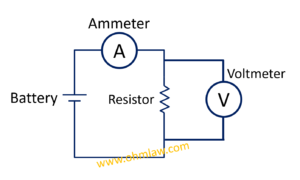

In [ ]:
# for google colab
# import requests
# from io import BytesIO
# from PIL import Image
# url = 'https://raw.githubusercontent.com/jAnirudh/SVNIT/main/ohm-law-circuit-diagram-with-instruments.png'
# page = requests.get(url)
# Image.open(BytesIO(page.content))

Say we are experimentally verifying Ohm's Law $V = I R$, but we have a faulty potentiometer. This means that I have noisy measurements for the voltage $V$ and the current $I$. I have taken n = 75 measurements and I want to find an approximate value to the resistance. 

In [ ]:
import numpy
import matplotlib.pyplot as plot
from ohmslaw import get_data, plot_figure

In [ ]:
# using help in Jupyter notebooks
get_data?

In [ ]:
i, v = get_data()
#i, v = get_data(nobs=10) # caveat 1
#v[10] = 7                # caveat 2

Now that we have the data, what we are interested in is finding the parameters $\theta = (\hat{\beta_0}, \hat{\beta_1})$. For this we recall that the linear regression model _approximates_ the true functional dependance between the between the data.

i.e. $$Y_i \approx \hat{Y_i} = \hat{\beta_0} + \hat{\beta_1}X_i$$

To make the approximation exact, we can add an error term to obtain,

$$Y_i = \hat{Y_i} + \epsilon_i = \hat{\beta_0} + \hat{\beta_1}X_i + \epsilon_i.$$

__Terminology__: $\epsilon_i = Y_i - \hat{Y_i}$ is called the residual error for the $i^{th}$ observation

Now, if we make the $i^{th}$ residual error smaller and smaller, the approximated value of each data point approaches the real value. Further, cumulatively, if all $\epsilon_i$ are as small as possible, we are cumulatively closer to the overall real functional dependance.

### Least Squared Errors Linear Regression

So we are interested in making each point move closer to the real value. For this we __minimize__ something called as the __Residual Sum-of-Squares__ (RSS) instead of the residual error. RSS is defined as

$$RSS = \sum_i \epsilon_i^2 = \sum_i (Y_i - \hat{\beta_0} - \hat{\beta_1}X_i)^2$$

The solution of the minimization problem is:

$$\hat{\beta_1}= \frac{(X_i-\bar{X})(Y_i-\bar{Y})}{(X-\bar{X})^2}$$
and
$$\hat{\beta_0}= \bar{Y} - \hat{\beta_1}\bar{X}$$

where
$$\bar{X} = \frac{\sum_{i=1}^n X_i}{n}$$ i.e. bar represents the average/mean value

### Let's get back to our Ohm's Law problem

We wanted to evaluate a linear regression fit. Let us compute the parameters.

In [ ]:
def compute_parameters():
    i_bar  = numpy.mean(i)
    v_bar  = numpy.mean(v)
    beta1  = numpy.sum((i - i_bar)*(v-v_bar))
    beta1 /= numpy.sum((i-i_bar)**2)
    beta0  = v_bar - beta1*i_bar
    return beta0, beta1

In [ ]:
beta0_hat, beta1_hat = compute_parameters()
print('beta0_hat = {:.5f}, beta1_hat = {:.5f}'.format(beta0_hat, beta1_hat))

In [ ]:
v_hat = beta0_hat+beta1_hat*i

plot.plot(v_hat, i, '-', color='magenta', label='Regression Curve', linewidth=2)
plot_figure(voltage=v, current=i)

We can see that we are pretty close to the real relationship.

### Connection of Least Square Regression Estimate to Statistics

The Covariance between two random variables $X$ and $Y$ is given as
$$Cov(X, Y) = \sum_i\frac{(X_i-\bar{X})(Y_i-\bar{Y})}{n}$$ 
and the Variance of a random variable $X$ is given as
$$Var(X) = \sum_i\frac{(X-\bar{X})^2}{n}$$

This means that:

$$\hat{\beta_1}= \frac{Cov(X, Y)}{Var(X)}$$
and
$$\hat{\beta_0}= \bar{Y} - \hat{\beta_1}\bar{X}$$

#### Thus regression is directly related to statistics of the measured data!

In [ ]:
print('beta0_hat = {:.5f}, beta1_hat = {:.5f}'.format(beta0_hat, beta1_hat))

In [ ]:
def compute_parameters_stats():
    cov = numpy.cov(i, v)
    beta1 = cov[0,1]/cov[0,0]
    beta0 = numpy.mean(v) - beta1*numpy.mean(i)
    return beta0, beta1

In [ ]:
compute_parameters_stats()

In [ ]:
# Using the regression model as a predictive tool
reg = lambda x: beta0_hat + beta1_hat*x

In [ ]:
reg(5)

Multiple linear Regression is a __multi-variate__ extension of simple linear Regression. Next we'll look at how to use Scikit-learn and Pandas to deal with multivariate data.

### Linear Regression Using Scikit-learn

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression() # create a Linear regression object
model.fit(i.reshape(-1,1), v.reshape(-1,1)) # necessary to reshape like this since we are performing simple LR 

print(model.intercept_, model.coef_) # print regression coefficients

## Caveats of Using Linear Regression

1. Fewer observations: Uncomment line 2 in cell 3 and re-run the notebook
2. Presence of outliers: Comment line 2, uncomment line 3 and re-run the notebook
3. Data non-linearity: the functional dependance could be inherently non-linear! Be careful with your predictions